# **Comunicação e Redes - Agrupamentos e Pontes**
---
Esse material aborda como alguns conceitos teóricos estudados na disciplina de Comunicação e Redes podem ser utilizados de forma prática com o uso da biblioteca NetworkX.

#### **Conceitos teóricos abordados:**
*   Fechamento Triádico
*   Coeficiente de Agrupamento Global
*   Coeficiente de Agrupamento Local
*   Coeficiente de Agrupamento Médio
*   Pontes e Pontes Locais
*   Conectividade de Aresta
*   Componentes Conexas
*   Comunidades em Grafos

## **Importação das bibliotecas NetworkX e Matplotlib**
---
A biblioteca NetworkX é um pacote em Python que visa a criação, manipulação e estudo de grafos e redes complexas. Essa biblioteca é muito utilizada em áreas como ciência da computação, análise de redes sociais, bioinformática, pesquisa operacional, entre outras. Já a biblioteca Matplotlib é uma das bibliotecas mais populares para visualização de dados em Python.

A importação das bibliotecas pode ser feita com os comandos:

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

##**Agrupamentos em Grafos**
---
O estudo de agrupamentos em grafos visa entender como os vértices de um grafo se organizam e se conectam entre si. Este campo possui grande relevância em áreas como ciência da computação, física, matemática, biologia, sociologia e ciência de redes.

Dentre as possibilidades oferecidas pelo estudo de agrupamentos, destaca-se a detecção de comunidades no grafo e a medição da tendência dos vértices do grafo formarem triângulos.

Para que possamos estudar esses conceitos de forma prática com a biblioteca NetworkX, vamos criar um digrafo que represente as conexões entre websites na internet, de forma que os websites sejam identificados pelos vértices e uma aresta de um vértice A para um vértice B indica que o website A faz referêcia ao website B, ou seja, possui um hyperlink para o site B.

A imagem abaixo mostra um mapa da internet criado por Ruslan Enikeev, um pesquisador que utilizou a ideia mencionada acima para criar um mapa onde os websites que possuem maior tráfego no mundo são destacados com maior tamanho e as conexões entre os websites influenciam na proximidade deles no mapa. O mapa da internet pode ser acessado pelo link: [http://internet-map.net/](http://internet-map.net/).




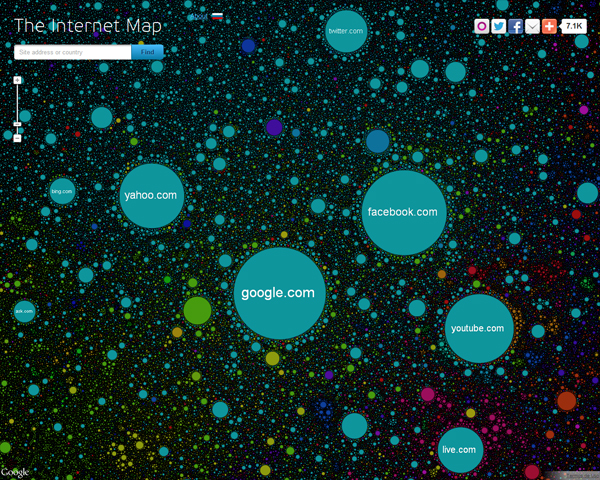


Para a criação do nosso digrafo, vamos considerar 15 websites para serem os vértices. A identificação dos websites será feita por números (de 1 a 15). Já as referências que ocorrem entre os websites são listadas a seguir:

  *   1: {-}
  *   2: {1,5}
  *   3: {1,4}
  *   4: {1,3}
  *   5: {1,2}
  *   6: {3,7,8}
  *   7: {3,4}
  *   8: {3,4,7}
  *   9: {5,10}
  *   10: {2,5,9}
  *   11: {12,13}
  *   12: {11}
  *   13: {4,11,12}
  *   14: {15}
  *   15: {14}

Com essas informações já é possível gerar o digrafo para esses websites com o código abaixo:

In [94]:
#Criação de um digrado
DG = nx.DiGraph()

#Adição dos 15 vértices do digrafo (15 websites)
DG.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

#Adição das arestas direcionadas do digrafo (referências entre os websites)
DG.add_edges_from([(2,1), (2,5),
                   (3,1), (3,4),
                   (4,1), (4,3),
                   (5,1), (5,2),
                   (6,3), (6,7), (6,8),
                   (7,3), (7,4),
                   (8,3), (8,4), (8,7),
                   (9,5), (9,10),
                   (10,2), (10,5), (10,9),
                   (11,12), (11,13),
                   (12,11),
                   (13,4), (13,11), (13,12),
                   (14,2), (14,15),
                   (15,14),
                   ])

Vamos plotar esse digrafo com os websites para obtermos uma visualização inicial:

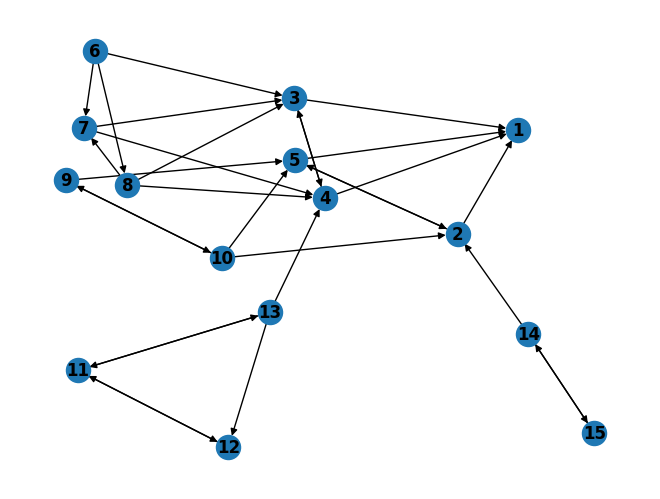

In [95]:
#Plotando o digrafo com o layout Kamada Kawai
nx.draw_kamada_kawai(DG, with_labels=True, font_weight='bold')


## **Fechamento Triádico**
---
O princípio do fechamento triádico refere-se à tendência de três vértices em um grafo formarem um triângulo quando dois dos vértices já estão conectados. Ou seja, se dois vértices têm uma conexão comum, é provável que eles se conectem para completar o triângulo. Esse princípio é muito utilizado em redes sociais como o Facebook para implementação do mecanismo de sugestão de amizade.

No contexto do nosso digrafo DG implementado para representar as conexões entre websites, podemos observar o princípio do fechamento triádico também. Se um website A faz referência aos websites B e C, pode-se imaginar que os websites B e C tratam do mesmo tema. Logo, existe uma chance de B fazer referência a C e vice-versa.

A biblioteca NetworkX oferece uma função para contagem do número de triângulos que um vértice do grafo participa. Esse valor pode ser utilizado para análise e identificação de agrupamentos. Essa função retorna um dicionário onde a chave é o identificador do nó e o valor é o número de triângulos nos quais o nó está envolvido. É importante destacar que essa função funciona apenas para grafos não direcionados. Logo, quando utiliza-se digrafos é necessário fazer a conversão antes de aplicá-la. O código abaixo pode ser utilizado para contagem dos triângulos no nosso digrafo DG:


In [96]:
#Conversão do digrafo DG para o grafo G
G = nx.to_undirected(DG)

#Cálculo da quantidade de triângulos
nx.triangles(G)

{1: 2,
 2: 2,
 3: 6,
 4: 4,
 5: 3,
 6: 3,
 7: 5,
 8: 5,
 9: 1,
 10: 2,
 11: 1,
 12: 1,
 13: 1,
 14: 0,
 15: 0}

## **Coeficiente de Agrupamento  - Global, Local e Médio**
---
O **coeficiente de agrupamento global** é uma métrica utilizada para indicar a probabilidade de que dois nós quaisquer do grafo que têm um vizinho em comum estejam conectados entre si, formando triângulos. Esse coeficiente é usado para entender o grau de conectividade e coesão em um grafo. Quanto maior o coeficiente, maior a presença de comunidades ou grupos densamente interconectados. O comando para cálculo desse coeficiente com a biblioteca NetworkX é:


In [97]:
#Cálculo do coeficiente de agrupamento global no digrafo DG
nx.transitivity(DG)

0.5

Já o **coeficiente de agrupamento local** é uma métrica usada para medir o grau de agrupamento ao redor de um único vértice do grafo. Esse coeficiente reflete a probabilidade de que os vizinhos de um nó também estejam conectados entre si, formando triângulos. O comando para cálculo desse coeficiente com a biblioteca NetworkX é:

In [98]:
#Cálculo do coeficiente de agrupamento local dos vértices do digrafo DG
nx.clustering(DG)

{1: 0.3333333333333333,
 2: 0.2222222222222222,
 3: 0.32142857142857145,
 4: 0.25,
 5: 0.3333333333333333,
 6: 0.5,
 7: 0.5,
 8: 0.5,
 9: 0.5,
 10: 0.4,
 11: 0.5,
 12: 1.0,
 13: 0.4,
 14: 0,
 15: 0}

Podemos ainda calcular o **coeficiente de agrupamento médio** de um grafo. Esse coeficiente  é a média dos coeficientes de agrupamento de todos os vértices da rede. Esse valor indica qual a probabilidade de, ao sorteamos dois vizinhos de um determinado vértice, eles estarem interligados. O cálculo desse coeficiente com a biblioteca NetworkX pode ser feito com o seguinte comando:

In [99]:
#Cálculo do coeficiente de agrupamento médio do digrafo DG
nx.average_clustering(DG)

0.3840211640211641

## **Pontes e Conectividade de Aresta**
---
Um outro conceito muito relevante no contexto de agrupamento em grafos é o de **Pontes**. Uma ponte é uma aresta que, se removida, separa o grafo em componentes desconexas, ou seja, faz com que o número de componentes conexas existentes no grafo aumente. As pontes, portanto, são elementos cruciais para manter a coesão do grafo e representam conexões críticas. Um grafo que possui pontes, pode indicar uma estrutura de componentes frágeis dependendo do contexto e da aplicação.

Nesse contexto, podemos definir a **conectividade de aresta** de um grafo como sendo o menor número de arestas que desconectam o grafo. Dessa forma, se um grafo possuir uma ponte, certamente a conectividade de aresta desse grafo será 1 pois apenas uma aresta já é suficiente para desconectar o grafo.

Também podemos definir **Pontes Locais**, que são arestas que quando removidas não desconectam o grafo por completo, no entanto, aumentam o caminho mínimo entre os dois vértices participantes da aresta em mais de uma unidade.

No código seguinte são apresentadas algumas funções que a biblioteca NetworkX oferece para trabalhar com pontes em grafos.


In [100]:
#Verificação da existência de pontes(válida apenas para grafos não direcionados)
nx.has_bridges(G)

True

In [101]:
#Encontrar pontes existentes no grafo(válida apenas para grafos não direcionados)
bridges = list(nx.bridges(G))
print("Pontes existentes no grafo:")
print(bridges)

Pontes existentes no grafo:
[(2, 14), (4, 13), (14, 15)]


In [102]:
#Cálculo da conectividade de aresta - Retorna um conjunto de arestas de cardinalidade mínima que desconecta o grafo
print(list(nx.minimum_edge_cut(G)))

[(2, 14)]


## **Componentes Conexas**
---

 Uma **componente conexa** é um subgrafo no qual todos os vértices estão conectados diretamente ou indiretamente. Vimos que a presença de pontes pode indicar uma estrutura de componentes frágeis pois a remoção de uma aresta ponte cria o aumento de componentes conexas, desconectando o grafo.

 Vamos explorar algumas funções da biblioteca NetworkX para trabalhar com componentes conexas e observar as mudanças que ocorrem com a remoção de pontes.

 Como vamos remover algumas arestas, para não perder a estrutura do no digrafo e grafo equivalente, vamos utilizar uma cópia dos mesmos.

In [103]:
#Criando cópia do digrafo DG
DH = nx.DiGraph()
DH.add_nodes_from(DG)
DH.add_edges_from(DG.edges)

#Criando cópia do grafo G
H = nx.Graph()
H.add_nodes_from(G)
H.add_edges_from(G.edges)

In [104]:
#Calcula o número de componentes conexas do grafo
print("Número de componentes conexas antes da remoção: " + str(nx.number_connected_components(H)))

#Remoção de duas pontes do grafo
H.remove_edges_from([(2, 14), (4,13)])

#Calcula o número de componentes conexas do grafo
print("Número de componentes conexas após a remoção: " + str(nx.number_connected_components(H)))

Número de componentes conexas antes da remoção: 1
Número de componentes conexas após a remoção: 3


In [105]:
#Encontra as componentes conexas presentes no grafo (Após remoção de 2 pontes)
print(list(nx.connected_components(H)))

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}, {11, 12, 13}, {14, 15}]


Ao trabalhar com digrafos, o conceito de componentes conexas passa a ser dividido em componentes fracamente ou fortemente conexas. Uma componente fracamente conexa é um conjunto de vértices onde, se ignorarmos a direção das arestas, é possível chegar de um vértice a qualquer outro dentro da componente. Já uma componente fortemente conexa é um conjunto de vértices onde, para qualquer par de vértices, existe um caminho direcionado entre eles em ambos os sentidos.

Para encontrar componentes fracamente conexas basta transformar o digrafo em seu grafo equivalente e utilizar as funções mostradas acima. Para componentes fortemente conexas podemos utilizar as seguintes funções:

In [106]:
#Verifica se o digrafo é fortemente conectado como um todo
print(nx.is_strongly_connected(DH))

False


In [107]:
#Calcula o número de componentes fortemente conectadas do digrafo
print(nx.number_strongly_connected_components(DG))

9


In [108]:
#Encontra todas as componentes fortemente conectadas do digrafo
print(list(nx.strongly_connected_components(DG)))

[{1}, {2, 5}, {3, 4}, {7}, {8}, {6}, {9, 10}, {11, 12, 13}, {14, 15}]


## **Comunidades**
---
**Comunidades** em grafos, referem-se a grupos ou subconjuntos de vértices dentro de um grafo que são mais densamente conectados entre si do que com o restante do grafo. As comunidades apresentam algumas carcterísticas típicas que podem ser observadas a seguir:

*   **Densidade Interna Alta**: As comunidades tendem a ter um grande número de conexões internas. Ou seja, os vértices de uma comunidade são conectados por muitas arestas.
*   **Densidade Externa Baixa**: Em contraste, as conexões entre diferentes comunidades são geralmente mais fracas ou menos densas.
*   **Coesão Interna**: As comunidades geralmente representam grupos de vértices com interesses ou características semelhantes.

Nota-se que os diferentes tipos de coeficiente de agrupamento que vimos e as pontes contribuem para o entendimento da estrutura geral do grafo e o grau de coesão entre seus vértices. Grafos com altos coeficientes de agrupamento geralmente indicam a existência de estruturas mais densas, podendo formar comunidades. As pontes, por outro lado, podem ser vistas como "ligações frágeis" entre comunidades ou componentes.

A biblioteca NetworkX oferece uma boa quantidade de diferentes algoritmos para detecção de comunidades em grafos. A seguir, alguns desses foram utilizados no digrafo DG ou no grafo equivalente G que criamos para os websites.







In [ ]:
#Encontra comunidades k-clique no grafo usando o método de percolação.
list(nx.community.k_clique_communities(G,3))

[frozenset({1, 2, 5, 9, 10}),
 frozenset({1, 3, 4, 6, 7, 8}),
 frozenset({11, 12, 13})]

In [ ]:
#Encontra comunidades no grafo usando maximização gananciosa de modularidade.
list(nx.community.greedy_modularity_communities(DG))

[frozenset({1, 3, 4, 6, 7, 8}),
 frozenset({2, 5, 9, 10}),
 frozenset({11, 12, 13}),
 frozenset({14, 15})]

In [ ]:
#Encontra comunidades no grafo usando maximização gananciosa de modularidade.
list(nx.community.naive_greedy_modularity_communities(G))

[frozenset({3, 4, 6, 7, 8}),
 frozenset({1, 2, 5, 9, 10}),
 frozenset({11, 12, 13}),
 frozenset({14, 15})]

In [ ]:
#Encontra a melhor partição de um grafo usando o Algoritmo de Detecção da Comunidade Louvain.
list(nx.community.louvain_communities(DG))

[{3, 4, 6, 7, 8}, {1, 2, 5, 9, 10}, {11, 12, 13}, {14, 15}]

## **Referências**
---
1.   NetworkX Documentation. Disponível em: [https://networkx.org/documentation/stable/index.html](https://networkx.org/documentation/stable/index.html)
2.   Slides do professor Alexandre Donizeti Alves
3.   Slides do professor João Henrique Kleinschmidt
4.   ZINOVIEV, Dmitry. Complex Network Analysis in Python: Recognize, Construct, Visualize, Analyse, Interpret. The Pragmatic Programmers, 2018.
5.   http://internet-map.net/

**Produzido por:** Leonardo Severgnine Maioli

**Contato:** leo.severgnine@gmail.com